In [ ]:
!pip install librosa

In [1]:
%cd /notebooks/audio-identification-reproduction
!ls

/notebooks/audio-identification-reproduction
README.md    audio_fingerprint.py     dataset		output.txt
__pycache__  audio_identification.py  evaluation.ipynb


/usr/local/lib/python3.11/dist-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [2]:
import os
import numpy as np
from skimage.feature import peak_local_max
from scipy.ndimage import maximum_filter
from collections import defaultdict
import librosa

import matplotlib.pyplot as plt

WINDOW_SIZE = 1024
HOP_LENGTH = 512

In [3]:
# Load audio
y, sr = librosa.load('dataset/database_recordings/pop.00006.wav', sr=22050)

# Compute and plot STFT spectrogram
D = np.abs(librosa.stft(y, n_fft=WINDOW_SIZE, window='hann', hop_length=HOP_LENGTH))
spectrogram = librosa.amplitude_to_db(D, ref=np.max)  # Convert to log scale (decibels)


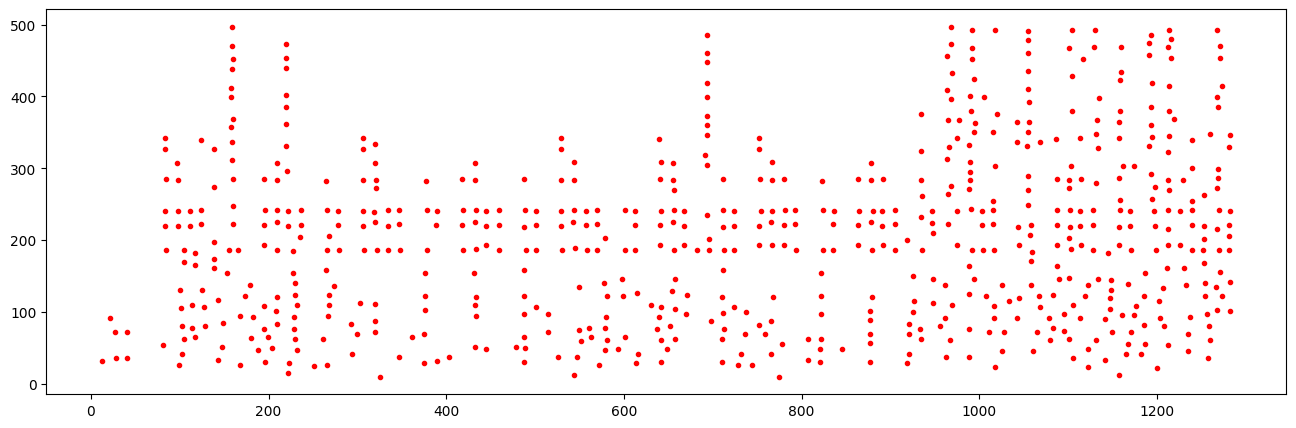

In [4]:
PEAK_NEIGHBORHOOD_SIZE = 10

peaks = peak_local_max(np.log(D), min_distance=PEAK_NEIGHBORHOOD_SIZE,threshold_rel=0.05)
plt.figure(figsize=(16, 5))
plt.plot(peaks[:, 1], peaks[:, 0], 'r.')

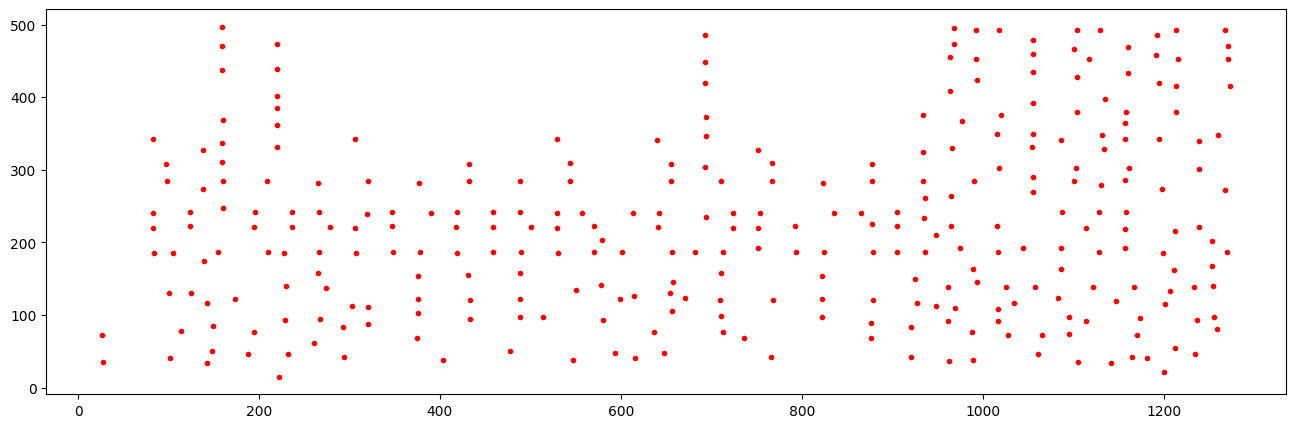

In [5]:
PEAK_NEIGHBORHOOD_SIZE = 15

peaks = peak_local_max(np.log(D), min_distance=PEAK_NEIGHBORHOOD_SIZE,threshold_rel=0.05)
plt.figure(figsize=(16, 5))
plt.plot(peaks[:, 1], peaks[:, 0], 'r.')

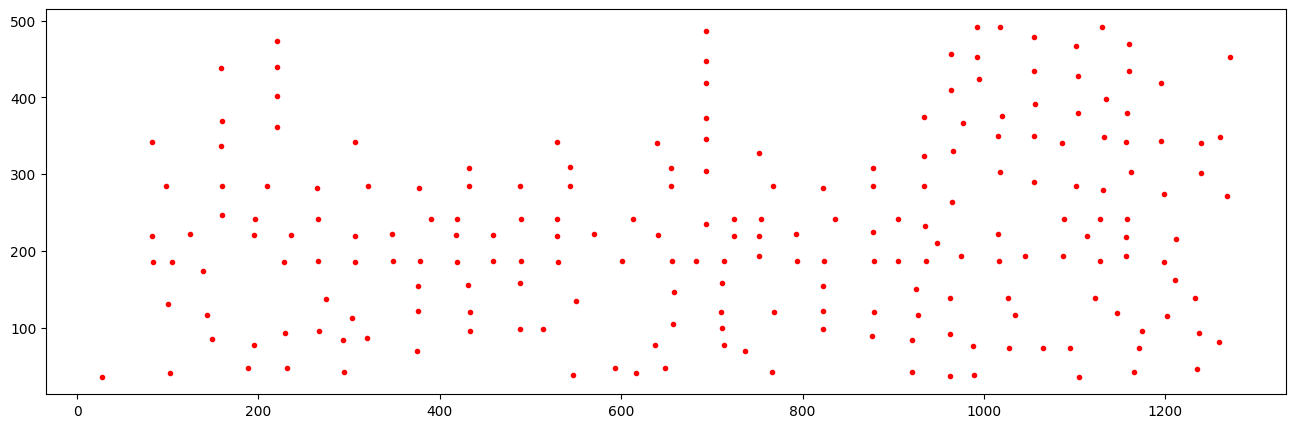

In [6]:
PEAK_NEIGHBORHOOD_SIZE = 20

peaks = peak_local_max(np.log(D), min_distance=PEAK_NEIGHBORHOOD_SIZE,threshold_rel=0.05)
plt.figure(figsize=(16, 5))
plt.plot(peaks[:, 1], peaks[:, 0], 'r.')

In [7]:
from audio_fingerprint import fingerprintBuilder_args
from audio_identification import audioIdentification_args

In [8]:
params = [{'WINDOW_SIZE':512,'PEAK_NEIGHBORHOOD_SIZE':10},
          {'WINDOW_SIZE':512,'PEAK_NEIGHBORHOOD_SIZE':15},
          {'WINDOW_SIZE':512,'PEAK_NEIGHBORHOOD_SIZE':20},
          {'WINDOW_SIZE':1024,'PEAK_NEIGHBORHOOD_SIZE':10},
          {'WINDOW_SIZE':1024,'PEAK_NEIGHBORHOOD_SIZE':15},
          {'WINDOW_SIZE':1024,'PEAK_NEIGHBORHOOD_SIZE':20},
          {'WINDOW_SIZE':2048,'PEAK_NEIGHBORHOOD_SIZE':10},
          {'WINDOW_SIZE':2048,'PEAK_NEIGHBORHOOD_SIZE':15},
          {'WINDOW_SIZE':2048,'PEAK_NEIGHBORHOOD_SIZE':20},]

In [9]:
folder_path = 'dataset/database_recordings'
query_path = 'dataset/query_recordings'
for p in params:
    WINDOW_SIZE = p['WINDOW_SIZE']
    HOP_LENGTH = int(0.5 * WINDOW_SIZE)
    PEAK_NEIGHBORHOOD_SIZE = p['PEAK_NEIGHBORHOOD_SIZE']
    output_file = f'dataset/fingerprint_database_{WINDOW_SIZE}_{PEAK_NEIGHBORHOOD_SIZE}.p'
    
    fingerprintBuilder_args(folder_path, output_file, 
                            WINDOW_SIZE=WINDOW_SIZE, 
                            HOP_LENGTH=HOP_LENGTH, 
                            PEAK_NEIGHBORHOOD_SIZE=PEAK_NEIGHBORHOOD_SIZE)
    
    output_file_pred = f'output_{WINDOW_SIZE}_{PEAK_NEIGHBORHOOD_SIZE}.txt'
    audioIdentification_args(query_path, output_file, output_file_pred,
                            WINDOW_SIZE=WINDOW_SIZE, 
                            HOP_LENGTH=HOP_LENGTH, 
                            PEAK_NEIGHBORHOOD_SIZE=PEAK_NEIGHBORHOOD_SIZE)
    
    with open(output_file_pred) as f:
        lines = [line.split() for line in f]

    r = []
    for line in lines:
        truth = line[0].split("-")[0]
        preds = line[1:]
        r.append([1 if truth in name else 0 for name in preds])
    r = np.array(r)

    p = np.sum(r, axis=1) / 1
    re = np.sum(r, axis=1) / 1
    p_mean = np.mean(p)
    re_mean = np.mean(re)
    f = (2 * p_mean * re_mean) / (p_mean + re_mean)
    f = np.nan_to_num(f)
    print(f'WINDOW_SIZE {WINDOW_SIZE}, PEAK_NEIGHBORHOOD_SIZE {PEAK_NEIGHBORHOOD_SIZE}\n')
    print(f'precision {p_mean}, recall {re_mean}, f-measure {f}\n\n')


200 fingerprints saved to dataset/fingerprint_database_512_10.p
[('classical.00041.wav', 310), ('pop.00011.wav', 305), ('classical.00077.wav', 281)]
[('pop.00069.wav', 582), ('classical.00083.wav', 201), ('classical.00075.wav', 198)]
[('classical.00020.wav', 791), ('pop.00049.wav', 325), ('classical.00003.wav', 308)]
[('pop.00049.wav', 235), ('classical.00050.wav', 232), ('pop.00003.wav', 203)]
[('classical.00069.wav', 311), ('classical.00087.wav', 238), ('classical.00026.wav', 184)]
[('pop.00014.wav', 891), ('classical.00093.wav', 257), ('classical.00091.wav', 230)]
[('pop.00039.wav', 1100), ('classical.00005.wav', 195), ('classical.00009.wav', 184)]
[('pop.00056.wav', 2459), ('pop.00059.wav', 1643), ('classical.00020.wav', 343)]
[('pop.00069.wav', 532), ('classical.00056.wav', 215), ('classical.00049.wav', 178)]
[('pop.00045.wav', 561), ('pop.00046.wav', 351), ('classical.00050.wav', 295)]
[('pop.00009.wav', 654), ('classical.00050.wav', 213), ('classical.00058.wav', 203)]
[('pop.000

In [ ]:
folder_path = 'dataset/database_recordings'
query_path = 'dataset/query_recordings'
output_file = 'dataset/fingerprint_database_512_5.p'
output_file_pred = 'output_512_5.txt'
audioIdentification_args(query_path, output_file, output_file_pred,
                            WINDOW_SIZE=512, 
                            HOP_LENGTH=256, 
                            PEAK_NEIGHBORHOOD_SIZE=5)